In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importations.requirement3_2 import *

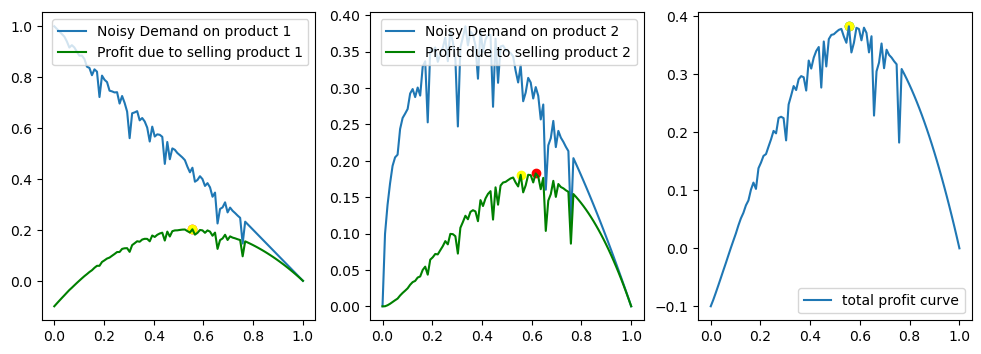

In [2]:
#Creating the noise:
D = 100
cost1 = 0.1 # cost of producing service 1
cost2 = 0.01 # cost of delivering service 2
np.random.seed(18)
prices1 = np.linspace(0,1,D)
prices2 = np.linspace(0,1,D)
conversion_probability_1 = lambda p1: 1- p1
conversion_probability_2 = lambda p1,p2: (1- p1)*np.sqrt(p2)
D1_obs = np.array([])
D2_obs = np.array([])
Prf1  = np.array([])
Prf2 = np.array([])
i0 = 5
f0 = D-25
for i in range(0,D):
     noise = np.random.normal(0, 0.15)
     if i < i0 or i > f0:
       new_y1_obs = conversion_probability_1(prices1[i]) 
       new_y1_prf = conversion_probability_1(prices1[i])*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i])
       new_y2_prf = conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 )
     else: 
       new_y1_obs = conversion_probability_1(prices1[i]) - noise**2
       new_y1_prf = (conversion_probability_1(prices1[i]) - noise**2)*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i]) - noise**2
       new_y2_prf = (conversion_probability_2(prices1[i], prices2[i]) - noise**2)*(prices2[i] - cost2)
     D1_obs = np.append(D1_obs,new_y1_obs)
     D2_obs = np.append(D2_obs, new_y2_obs)
     Prf1 = np.append(Prf1,new_y1_prf)
     Prf2 = np.append(Prf2,new_y2_prf)
 
D1_clean = np.array([])
D2_clean = np.array([])
Prf1c  = np.array([])
Prf2c = np.array([]) 
clean_prf = np.array([]) 
n = 100 # 100 customers
for i in range(0,D):  
  new_y1_obs = conversion_probability_1(prices1[i])*100
  new_y1_prf = conversion_probability_1(prices1[i])*(prices1[i] - cost1)*100
  new_y2_obs = conversion_probability_2(prices1[i], prices2[i])*100
  new_y2_prf = conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 )*100
  D1_clean = np.append(D1_clean,new_y1_obs)
  D2_clean = np.append(D2_clean, new_y2_obs)
  Prf1c = np.append(Prf1c,new_y1_prf)
  Prf2c = np.append(Prf2c,new_y2_prf)
  for j in range(0,D):
     clean_prf_i = 100*conversion_probability_1(prices1[i])*(prices1[i] - cost1) + 100*conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 )
     clean_prf = np.append(clean_prf, clean_prf_i)

total_prf = Prf1 + Prf2

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(prices1, D1_obs, label='Noisy Demand on product 1')
axs[0].plot(prices1, Prf1, label='Profit due to selling product 1', color = 'green')
#axs[0].plot(prices1, Prf1c, label='Clean Profit due to selling product 1', color = 'purple')
axs[0].scatter(prices1[np.argmax(Prf1)] ,Prf1[np.argmax(Prf1)], color = 'red')
axs[0].scatter(prices1[np.argmax(total_prf)] ,Prf1[np.argmax(total_prf)], color = 'yellow')
axs[0].set_title('')
axs[0].legend()

axs[1].plot(prices2, D2_obs, label='Noisy Demand on product 2')
axs[1].plot(prices2, Prf2, label='Profit due to selling product 2', color = 'green')
#axs[1].plot(prices2, Prf2c, label='Clean Profit due to selling product 2', color = 'purple')
axs[1].scatter(prices2[np.argmax(Prf2)] ,Prf2[np.argmax(Prf2)], color = 'red')
axs[1].scatter(prices2[np.argmax(total_prf)] ,Prf2[np.argmax(total_prf)], color = 'yellow')
axs[1].set_title('')
axs[1].legend()

axs[2].plot(prices1, total_prf, label='total profit curve')
axs[2].scatter(prices1[np.argmax(total_prf)] ,total_prf[np.argmax(total_prf)], color = 'green')
axs[2].scatter(prices2[np.argmax(total_prf)] ,total_prf[np.argmax(total_prf)], color = 'yellow')
axs[2].set_title('')
axs[2].legend()



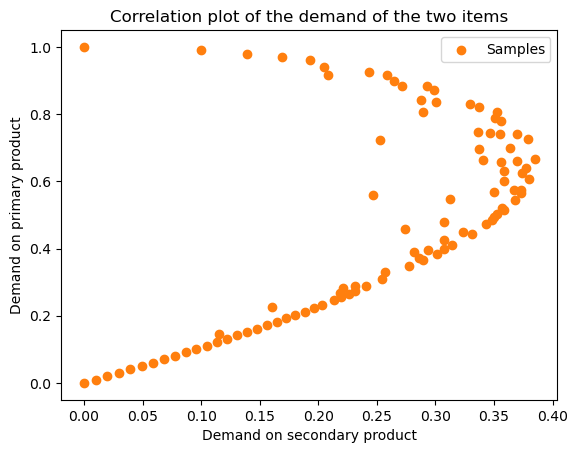

In [3]:
plt.scatter(D2_obs, D1_obs, label='Samples', color='C1')
plt.title('Correlation plot of the demand of the two items')
plt.ylabel('Demand on primary product')
plt.xlabel('Demand on secondary product')
plt.legend()
plt.show();

38.395934132498404

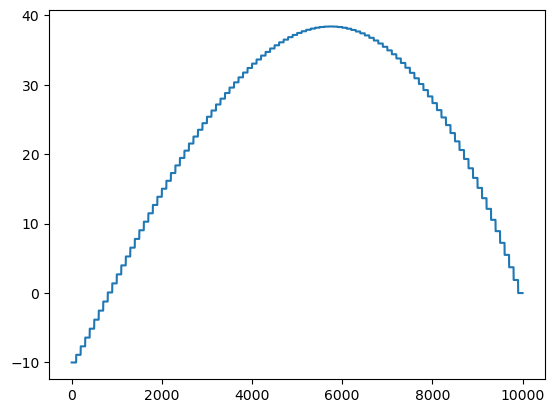

In [4]:
plt.plot(np.arange(10000),clean_prf) #the clairvpyant trying all possible prices 
max(clean_prf)

In [5]:
# For a 1000 rounds the clairvoyant will have achieved:
T = 1000
n_customers = 100
expected_clairvoyant_rewards = [n_customers*clean_prf[np.argmax(clean_prf)]]*T #In expectation
len(expected_clairvoyant_rewards) # A vector replicating the profits of the clairvoyant, who always  chooses the bset optimal 
# prices for the two goods.

1000

Text(0.5, 1.0, 'cumulative regret of UCB1/$T$')

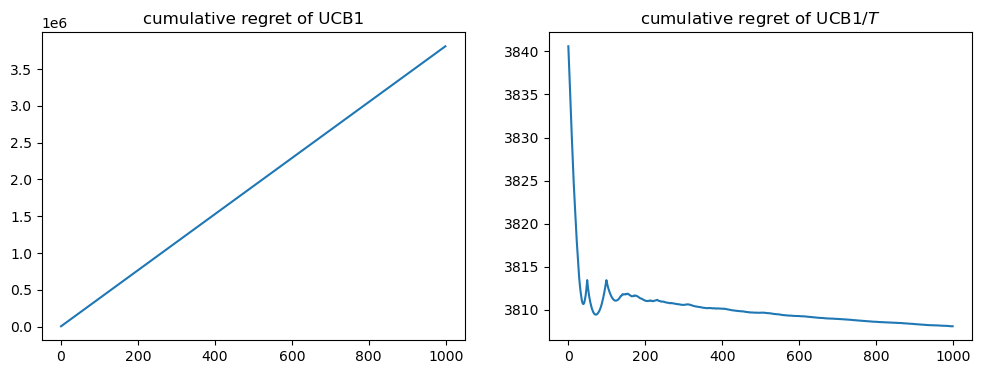

In [6]:

D = 50
cost1 = 0.1 # cost of producing service 1
cost2 = 0.01 # cost of delivering service 2
np.random.seed(18)
prices1 = np.linspace(0,1,D)
prices2 = np.linspace(0,1,D)
conversion_probability_1 = lambda p1: 1- p1
conversion_probability_2 = lambda p1,p2: (1- p1)*np.sqrt(p2)
D1_obs = np.array([])
D2_obs = np.array([])
Prf1  = np.array([])
Prf2 = np.array([])
i0 = 5
f0 = D-25
for i in range(0,D):
     noise = np.random.normal(0, 0.15)
     if i < i0 or i > f0:
       new_y1_obs = conversion_probability_1(prices1[i]) 
       new_y1_prf = conversion_probability_1(prices1[i])*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i])
       new_y2_prf = conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 ) 
     else: 
       new_y1_obs = conversion_probability_1(prices1[i]) - noise**2
       new_y1_prf = (conversion_probability_1(prices1[i]) - noise**2)*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i]) - noise**2
       new_y2_prf = (conversion_probability_2(prices1[i], prices2[i]) - noise**2)*(prices2[i] - cost2)
     D1_obs = np.append(D1_obs,new_y1_obs)
     D2_obs = np.append(D2_obs, new_y2_obs)
     Prf1 = np.append(Prf1,new_y1_prf)
     Prf2 = np.append(Prf2,new_y2_prf)



T = 1000
K1 = 50
K2 = 50

prices1 = np.linspace(0,1,K1)
prices2 = np.linspace(0,1,K2)
cost1 = 0.1
cost1 = 0.01

n_customers = 100


n_trials = 10

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    env = PricingEnv_2D(n_customers,D1_obs,D2_obs ,cost1,cost2 , prices1, prices2, seed)
    ucb_agent = UCB1Agent_2D(K1,K2,T, range= max(clean_prf))

    agent_rewards = np.array([])
    my_manc = np.array([])
    my_manc_2 = np.array([])

    for t in range(T):
        p1_t, p2_t = ucb_agent.pull_arm()    
        r_t_1, r_t_2 = env.round(p1_t, p2_t)
        ucb_agent.update(r_t_1,r_t_2)
        total_agent_profit = (r_t_1 + r_t_2)

        agent_rewards = np.append(agent_rewards, total_agent_profit)

    cumulative_regret = np.cumsum(expected_clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(np.arange(T), average_regret, label='Average Regret')
axs[0].set_title('cumulative regret of UCB1')
axs[0].fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
t = range(1, T + 1)
axs[1].plot(np.arange(T), average_regret/ np.array(t), label='Cumulative Regret over time')
axs[1].set_title('cumulative regret of UCB1/$T$')



Text(0.5, 1.0, 'Number of pulls for each action for item2')

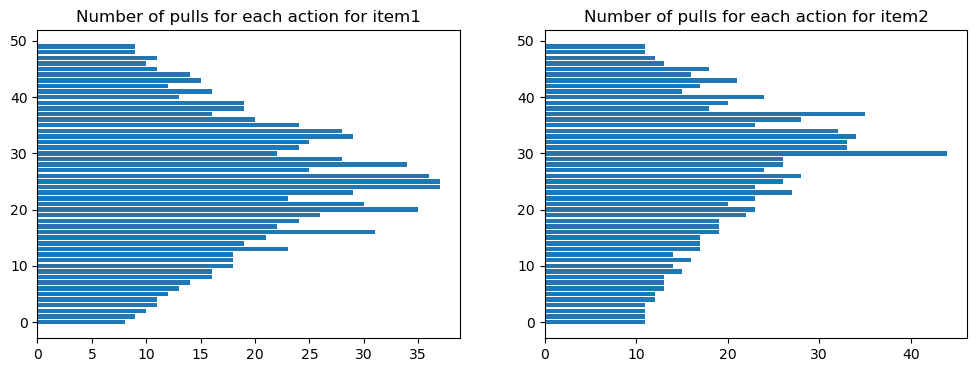

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].barh(np.arange(50), ucb_agent.N_pulls_1)
axs[0].set_title('Number of pulls for each action for item1')
axs[1].barh(np.arange(50), ucb_agent.N_pulls_2)
axs[1].set_title('Number of pulls for each action for item2')

In [8]:
D = 100
cost1 = 0.1 # cost of producing service 1
cost2 = 0.01 # cost of delivering service 2
np.random.seed(18)
prices1 = np.linspace(0,1,D)
prices2 = np.linspace(0,1,D)
conversion_probability_1 = lambda p1: 1- p1
conversion_probability_2 = lambda p1,p2: (1- p1)*np.sqrt(p2)
D1_obs = np.array([])
D2_obs = np.array([])
Prf1  = np.array([])
Prf2 = np.array([])
i0 = 5
f0 = D-25
for i in range(0,D):
     noise = np.random.normal(0, 0.15)
     if i < i0 or i > f0:
       new_y1_obs = conversion_probability_1(prices1[i]) 
       new_y1_prf = conversion_probability_1(prices1[i])*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i])
       new_y2_prf = conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 ) 
     else: 
       new_y1_obs = conversion_probability_1(prices1[i]) - noise**2
       new_y1_prf = (conversion_probability_1(prices1[i]) - noise**2)*(prices1[i] - cost1)
       new_y2_obs = conversion_probability_2(prices1[i], prices2[i]) - noise**2
       new_y2_prf = (conversion_probability_2(prices1[i], prices2[i]) - noise**2)*(prices2[i] - cost2)
     D1_obs = np.append(D1_obs,new_y1_obs)
     D2_obs = np.append(D2_obs, new_y2_obs)
     Prf1 = np.append(Prf1,new_y1_prf)
     Prf2 = np.append(Prf2,new_y2_prf)
T = 1000
cost1 = 0.1
cost1 = 0.01

n_customers = 100
seed = np.random.seed(18)
env = PricingEnv_2D(n_customers,D1_obs,D2_obs ,cost1,cost2 , prices1, prices2, seed)
agent = GPUCBAgent_2D(T)
agent_rewards_GP = np.array([])
ma_man = np.array([])
for t in range(T):
  p1_t, p2_t = agent.pull_arm()  
  r_t_1, r_t_2 = env.round(p1_t, p2_t)
  ma_man = np.append(ma_man,r_t_1)
  agent.update(r_t_1/n_customers,r_t_2/n_customers)
  total_agent_profit = (r_t_1 + r_t_2)

  agent_rewards_GP = np.append(agent_rewards_GP, total_agent_profit)

cumulative_regret_GP = np.cumsum(expected_clairvoyant_rewards-agent_rewards_GP)



In [9]:
t = range(1, T + 1)
(np.log(np.array(t)))**3
np.sqrt(np.array(t))*(np.log(np.array(t)))**3




array([0.00000000e+00, 4.70967979e-01, 2.29664561e+00, 5.32839443e+00,
       9.32196965e+00, 1.40901219e+01, 1.94947365e+01, 2.54322709e+01,
       3.18232550e+01, 3.86053119e+01, 4.57285023e+01, 5.31521526e+01,
       6.08426415e+01, 6.87718159e+01, 7.69158356e+01, 8.52543109e+01,
       9.37696503e+01, 1.02446557e+02, 1.11271637e+02, 1.20233085e+02,
       1.29320443e+02, 1.38524391e+02, 1.47836588e+02, 1.57249534e+02,
       1.66756463e+02, 1.76351241e+02, 1.86028294e+02, 1.95782540e+02,
       2.05609329e+02, 2.15504397e+02, 2.25463822e+02, 2.35483990e+02,
       2.45561561e+02, 2.55693444e+02, 2.65876770e+02, 2.76108872e+02,
       2.86387270e+02, 2.96709646e+02, 3.07073836e+02, 3.17477818e+02,
       3.27919692e+02, 3.38397680e+02, 3.48910107e+02, 3.59455401e+02,
       3.70032078e+02, 3.80638741e+02, 3.91274069e+02, 4.01936814e+02,
       4.12625797e+02, 4.23339900e+02, 4.34078062e+02, 4.44839278e+02,
       4.55622594e+02, 4.66427103e+02, 4.77251941e+02, 4.88096287e+02,
      

Text(0.5, 1.0, 'cumulative regret of GP_UCB/$T$')

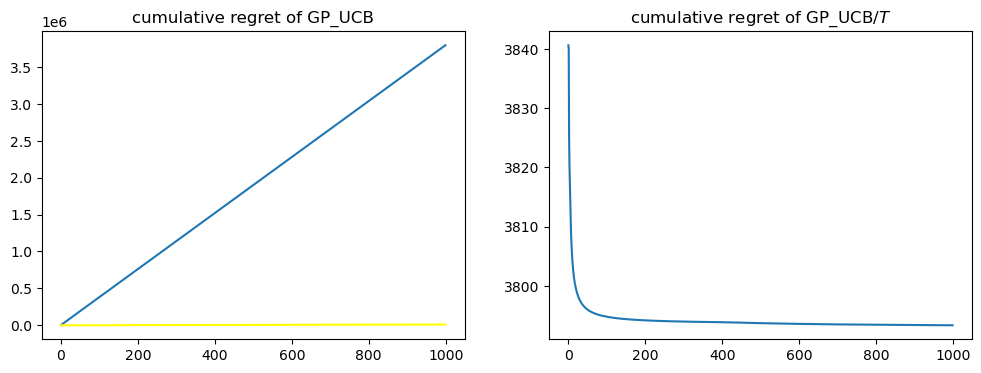

In [10]:
t = range(1, T + 1)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(np.arange(T), cumulative_regret_GP, label='Average Regret')
axs[0].plot(np.arange(T), np.sqrt(np.array(t))*(np.log(np.array(t)))**3, label='Theoratical bound' , color = 'yellow')
axs[0].set_title('cumulative regret of GP_UCB')
axs[1].plot(np.arange(T), cumulative_regret_GP/ np.array(t), label='Cumulative Regret over time')
axs[1].set_title('cumulative regret of GP_UCB/$T$')

What if we switch-off the noise:

In [11]:
D = 100
cost1 = 0.1 # cost of producing service 1
cost2 = 0.01 # cost of delivering service 2
np.random.seed(18)
prices1 = np.linspace(0,1,D)
prices2 = np.linspace(0,1,D)
conversion_probability_1 = lambda p1: 1- p1
conversion_probability_2 = lambda p1,p2: (1- p1)*np.sqrt(p2)
D1_obs = np.array([])
D2_obs = np.array([])
Prf1  = np.array([])
Prf2 = np.array([])
for i in range(0,D):
    new_y1_obs = conversion_probability_1(prices1[i]) 
    new_y1_prf = conversion_probability_1(prices1[i])*(prices1[i] - cost1)
    new_y2_obs = conversion_probability_2(prices1[i], prices2[i])
    new_y2_prf = conversion_probability_2(prices1[i], prices2[i])*(prices2[i] - cost2 ) 
    D1_obs = np.append(D1_obs,new_y1_obs)
    D2_obs = np.append(D2_obs, new_y2_obs)
    Prf1 = np.append(Prf1,new_y1_prf)
    Prf2 = np.append(Prf2,new_y2_prf)
T = 1000
cost1 = 0.1
cost1 = 0.01

n_customers = 100
seed = np.random.seed(18)
env = PricingEnv_2D(n_customers,D1_obs,D2_obs ,cost1,cost2 , prices1, prices2, seed)
agent = GPUCBAgent_2D(T)
agent_rewards_GP = np.array([])
for t in range(T):
  p1_t, p2_t = agent.pull_arm()  
  r_t_1, r_t_2 = env.round(p1_t, p2_t)
  agent.update(r_t_1/n_customers,r_t_2/n_customers)
  total_agent_profit = (r_t_1 + r_t_2)

  agent_rewards_GP = np.append(agent_rewards_GP, total_agent_profit)

cumulative_regret_GP = np.cumsum(expected_clairvoyant_rewards-agent_rewards_GP)



Text(0.5, 1.0, 'cumulative regret of GP_UCB/$T$')

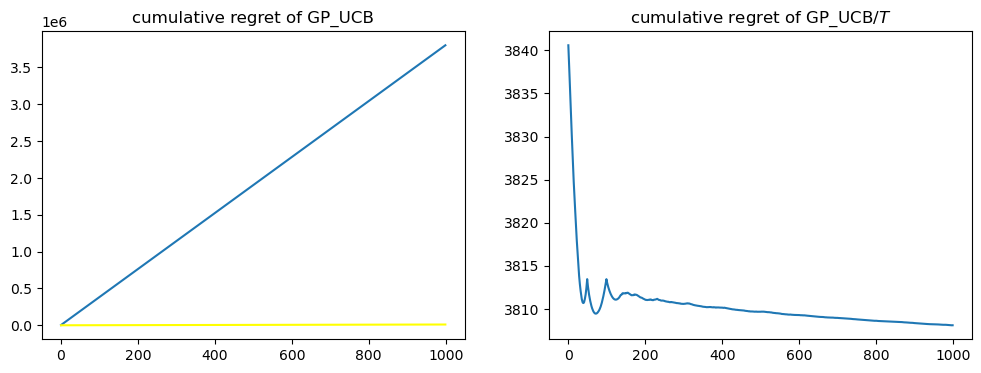

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
t = range(1, T + 1)
axs[0].plot(np.arange(T), cumulative_regret_GP, label='Average Regret')
axs[0].plot(np.arange(T), np.sqrt(np.array(t))*(np.log(np.array(t)))**3, label='Theoratical bound' , color = 'yellow')
axs[0].set_title('cumulative regret of GP_UCB')
axs[1].plot(np.arange(T), average_regret/ np.array(t), label='Cumulative Regret over time')
axs[1].set_title('cumulative regret of GP_UCB/$T$')